<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [5]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.003492,92.581504,46.329938,451.899038,648.813972,585.591305,63.222667
1,0.0,1.0,54.297230,60.044229,22.045530,-385.904730,-239.517741,157.657989,-397.175731
2,0.0,2.0,81.941550,87.775341,61.936677,-665.926387,-424.272819,1151.779826,-1576.052645
3,0.0,3.0,72.138435,63.826673,59.562964,-153.988210,51.539861,653.971895,-602.432034
4,0.0,4.0,71.108201,65.672055,48.406046,-174.847907,20.338395,618.437456,-598.099061
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.950143,38.065735,30.464592,-211.674576,-109.194106,109.915379,-219.109485
19996,999.0,16.0,23.593593,52.427437,62.927442,292.793102,441.741574,217.637625,224.103949
19997,999.0,17.0,96.052011,97.811966,80.565256,-351.782953,-67.353720,86.799133,-154.152853
19998,999.0,18.0,59.773283,93.348143,81.324793,488.126991,732.573209,206.465948,526.107261


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.003492,92.581504,46.329938,451.899038,648.813972,585.591305,63.222667
1,0.0,1.0,54.297230,60.044229,22.045530,-385.904730,-239.517741,157.657989,-397.175731
2,0.0,2.0,81.941550,87.775341,61.936677,-665.926387,-424.272819,1151.779826,-1576.052645
3,0.0,3.0,72.138435,63.826673,59.562964,-153.988210,51.539861,653.971895,-602.432034
4,0.0,4.0,71.108201,65.672055,48.406046,-174.847907,20.338395,618.437456,-598.099061
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.950143,38.065735,30.464592,-211.674576,-109.194106,109.915379,-219.109485
19996,999.0,16.0,23.593593,52.427437,62.927442,292.793102,441.741574,217.637625,224.103949
19997,999.0,17.0,96.052011,97.811966,80.565256,-351.782953,-67.353720,86.799133,-154.152853
19998,999.0,18.0,59.773283,93.348143,81.324793,488.126991,732.573209,206.465948,526.107261


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    48.003492  92.581504  ...   585.591305    63.222667
      1.0    54.297230  60.044229  ...   157.657989  -397.175731
      2.0    81.941550  87.775341  ...  1151.779826 -1576.052645
      3.0    72.138435  63.826673  ...   653.971895  -602.432034
      4.0    71.108201  65.672055  ...   618.437456  -598.099061
...                ...        ...  ...          ...          ...
999.0 15.0   23.950143  38.065735  ...   109.915379  -219.109485
      16.0   23.593593  52.427437  ...   217.637625   224.103949
      17.0   96.052011  97.811966  ...    86.799133  -154.152853
      18.0   59.773283  93.348143  ...   206.465948   526.107261
      19.0   92.458100  90.846642  ...   -12.544542  -245.981028

[20000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    48.003492  92.581504  ...   585.591305    63.222667
      1.0    54.297230  60.044229  ...   157.657989  -397.175731
      2.0    81.941550  87.775341  ...  1151.779826 -1576.052645
      3.0    72.138435  63.826673  ...   653.971895  -602.432034
      4.0    71.108201  65.672055  ...   618.437456  -598.099061
...                ...        ...  ...          ...          ...
999.0 15.0   23.950143  38.065735  ...   109.915379  -219.109485
      16.0   23.593593  52.427437  ...   217.637625   224.103949
      17.0   96.052011  97.811966  ...    86.799133  -154.152853
      18.0   59.773283  93.348143  ...   206.465948   526.107261
      19.0   92.458100  90.846642  ...   -12.544542  -245.981028

[20000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,48.003492,92.581504,46.329938,451.899038,648.813972,585.591305,63.222667
1,0.0,1.0,54.297230,60.044229,22.045530,-385.904730,-239.517741,157.657989,-397.175731
2,0.0,2.0,81.941550,87.775341,61.936677,-665.926387,-424.272819,1151.779826,-1576.052645
3,0.0,3.0,72.138435,63.826673,59.562964,-153.988210,51.539861,653.971895,-602.432034
4,0.0,4.0,71.108201,65.672055,48.406046,-174.847907,20.338395,618.437456,-598.099061
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.950143,38.065735,30.464592,-211.674576,-109.194106,109.915379,-219.109485
19996,999.0,16.0,23.593593,52.427437,62.927442,292.793102,441.741574,217.637625,224.103949
19997,999.0,17.0,96.052011,97.811966,80.565256,-351.782953,-67.353720,86.799133,-154.152853
19998,999.0,18.0,59.773283,93.348143,81.324793,488.126991,732.573209,206.465948,526.107261


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    48.003492  92.581504  ...   585.591305    63.222667
      1.0    54.297230  60.044229  ...   157.657989  -397.175731
      2.0    81.941550  87.775341  ...  1151.779826 -1576.052645
      3.0    72.138435  63.826673  ...   653.971895  -602.432034
      4.0    71.108201  65.672055  ...   618.437456  -598.099061
...                ...        ...  ...          ...          ...
999.0 15.0   23.950143  38.065735  ...   109.915379  -219.109485
      16.0   23.593593  52.427437  ...   217.637625   224.103949
      17.0   96.052011  97.811966  ...    86.799133  -154.152853
      18.0   59.773283  93.348143  ...   206.465948   526.107261
      19.0   92.458100  90.846642  ...   -12.544542  -245.981028

[20000 rows x 7 columns]

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

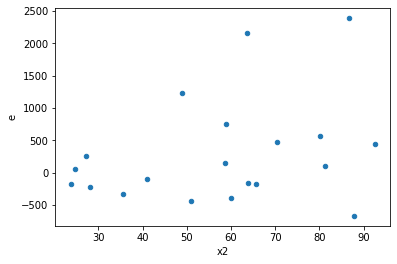

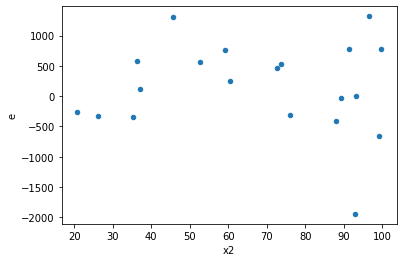

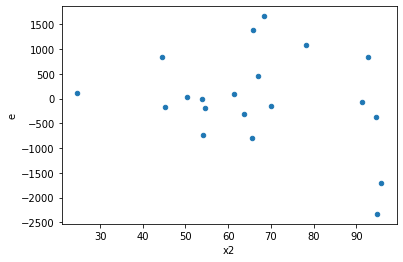

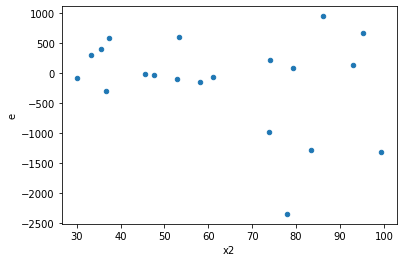

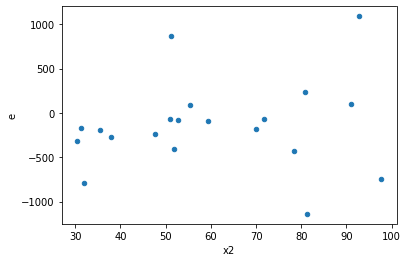

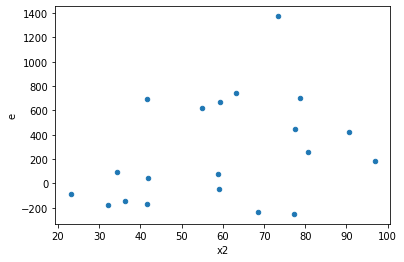

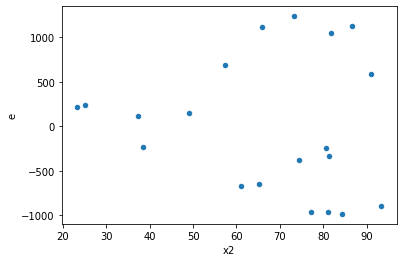

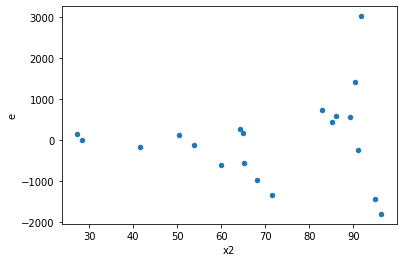

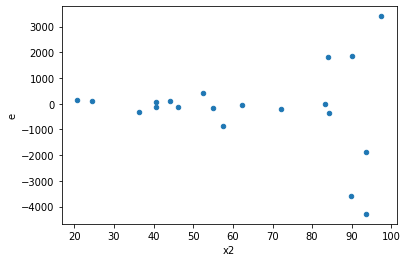

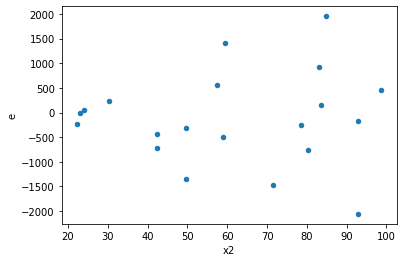

In [14]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,2453291.1318761343,1151663.3615065638,613322.7829690336,287915.84037664096,2.130215489938682,0.4261965666368246,0.7869017166815877,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6292002.280794877,675494.2695803926,1573000.5701987192,168873.56739509816,9.314664186127558,0.028557547434565622,0.9857212262827172,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,7519916.264914104,815605.5760519592,1879979.066228526,203901.3940129898,9.220040281376201,0.029193072792386143,0.9854034636038069,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,8637056.988620698,508266.20280337945,2159264.2471551746,127066.55070084486,16.99317590070396,0.007445536464049773,0.9962772317679751,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,3012907.963057435,671404.096038895,753226.9907643588,167851.02400972374,4.4874733127676585,0.1250472963381013,0.9374763518309494,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,1365237.1051788342,329447.63299961586,341309.27629470854,82361.90824990397,4.144018558422686,0.14479687943497566,0.9276015602825122,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4393065.9283946715,871386.4976370306,1098266.4820986679,217846.62440925764,5.041466605584897,0.10033777453568327,0.9498311127321584,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,10629796.054234236,481549.82884553634,2657449.013558559,120387.45721138408,22.074135255572667,0.004052706604961598,0.9979736466975192,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,33163747.259300932,323746.47715459304,8290936.814825233,80936.61928864826,102.43739963065242,9.881466822547758e-05,0.9999505926658873,Reject001=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,2453291.1318761343,1151663.3615065638,613322.7829690336,287915.84037664096,2.130215489938682,0.4261965666368246,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,6292002.280794877,675494.2695803926,1573000.5701987192,168873.56739509816,9.314664186127558,0.028557547434565622,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,7519916.264914104,815605.5760519592,1879979.066228526,203901.3940129898,9.220040281376201,0.029193072792386143,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,8637056.988620698,508266.20280337945,2159264.2471551746,127066.55070084486,16.99317590070396,0.007445536464049773,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,3012907.963057435,671404.096038895,753226.9907643588,167851.02400972374,4.4874733127676585,0.1250472963381013,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,1365237.1051788342,329447.63299961586,341309.27629470854,82361.90824990397,4.144018558422686,0.14479687943497566,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4393065.9283946715,871386.4976370306,1098266.4820986679,217846.62440925764,5.041466605584897,0.10033777453568327,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,10629796.054234236,481549.82884553634,2657449.013558559,120387.45721138408,22.074135255572667,0.004052706604961598,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,33163747.259300932,323746.47715459304,8290936.814825233,80936.61928864826,102.43739963065242,9.881466822547758e-05,Reject001=0 : Heteroscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      554
Reject001=0 : Heteroscedasticity    446
Name: Result_test, dtype: int64